In [187]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from PIL import Image

In [148]:
# Load dataset
data = loadmat("digits.mat")
features = data["digits"]
labels = data["labels"]

In [149]:
# Shuffle data
random.seed(10)
combined = list(zip(features, labels))
random.shuffle(combined)
features[:], labels[:] = zip(*combined)

In [150]:
# Split data between train and test
train_X = features[:2500]
train_Y = labels[:2500]
test_X = features[2500:]
test_Y = labels[2500:]

In [151]:
# Apply PCA
pca = PCA(n_components=400)
#principal_components = pca.fit_transform(train_X)
pca.fit_transform(train_X)
eigen_values = pca.explained_variance_
principal_components = pca.components_
pves = pca.explained_variance_ratio_

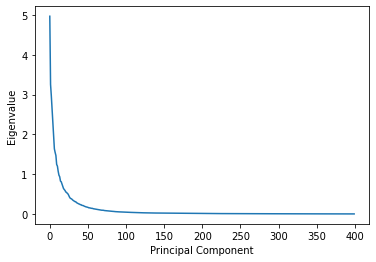

In [152]:
# Plot Principal Components vs. Eigenvalues
plt.plot(eigen_values)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

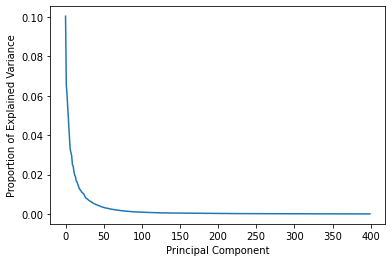

In [153]:
# Plot Principal Components vs. Proportion of Explained Variance
plt.plot(pve)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Explained Variance")
plt.show()

In [154]:
# Find the mean of data 
train_X_mean = (pca.mean_.reshape(20,20)).T

(-0.5, 19.5, 19.5, -0.5)

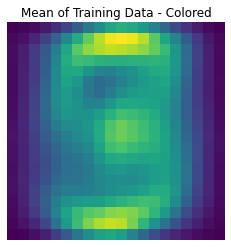

In [155]:
# Display mean of data as colored
plt.imshow(train_X_mean)
plt.title("Mean of Training Data - Colored")
plt.axis("off")

(-0.5, 19.5, 19.5, -0.5)

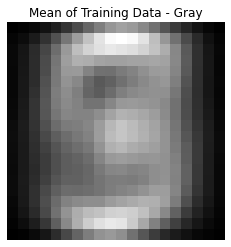

In [156]:
# Display mean of data as gray
plt.imshow(train_X_mean, cmap="gray")
plt.title("Mean of Training Data - Gray")
plt.axis("off")

In [219]:
principal_components.shape

(400, 400)

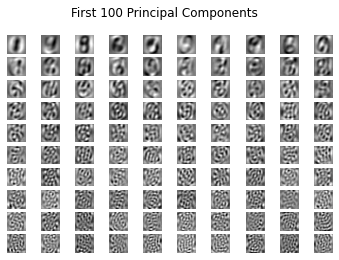

In [221]:
# Display eigenvectors - first 100
first_100_pc = plt.figure()
first_100_pc.suptitle("First 100 Principal Components")
for index in range(100):
    pc = (principal_components[index]).reshape(20, 20)
    first_100_pc.add_subplot(10, 10, index + 1)
    plt.imshow(pc.T, cmap="gray") # show the image as black & white
    plt.axis('off') # turn off axis ticks
plt.show(block=True)

In [182]:
component_count = [i for i in range(2, 201, 2)]
classification_errors_train = []
classification_errors_test = []

In [183]:
for i in component_count:

    # Get i number of components and fit training data
    pca = PCA(n_components=i)
    pca.fit(train_X)

    # Project train and test data to principal components
    train_X_projected = pca.transform(train_X)
    test_X_projected = pca.transform(test_X)

    # Create model and fit train data
    model = GaussianNB()
    model.fit(train_X_projected, (train_Y.T)[0])

    # Predict output for Train data
    predict_test_X = model.predict(train_X_projected)
    accuracy_train = metrics.accuracy_score((train_Y.T)[0], predict_test_X)
    classification_error_train = 1 - accuracy_train
    classification_errors_train.append(classification_error_train)

    # Predict output for Test data
    predict_test_Y = model.predict(test_X_projected)
    accuracy_test = metrics.accuracy_score((test_Y.T)[0], predict_test_Y)
    classification_error_test = 1 - accuracy_test
    classification_errors_test.append(classification_error_test)

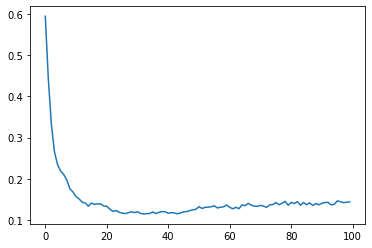

In [184]:
plt.plot(classification_errors_train)

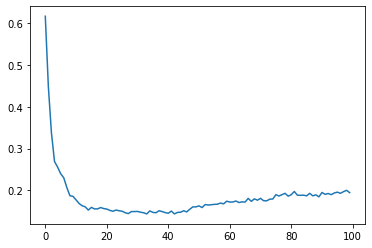

In [185]:
plt.plot(classification_errors_test)

In [199]:
lda = LDA(n_components=9)
lda.fit(train_X, (train_Y.T)[0])
bases = lda.coef_

In [210]:
scalings = lda.scalings_

In [203]:
lda.explained_variance_ratio_

array([0.25804556, 0.1835241 , 0.16614328, 0.1078362 , 0.09991999,
       0.0635403 , 0.05346163, 0.03945211, 0.02807683])

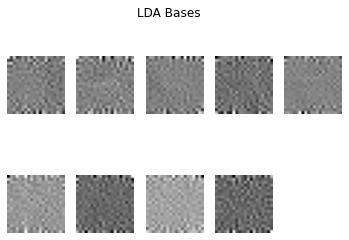

In [212]:
# Display new bases
lda_bases = plt.figure()
lda_bases.suptitle("LDA Bases")
for index in range(9):
    base = (scalings[:,index]).reshape(20, 20)
    lda_bases.add_subplot(2, 5, index + 1)
    plt.imshow(base, cmap="gray") # show the image as black & white
    plt.axis('off') # turn off axis ticks
plt.show(block=True)

In [227]:
classification_errors_train = []
classification_errors_test = []

In [228]:
for i in range(9):

    # Get i number of components and fit training data
    lda = LDA(n_components=(i+1))
    lda.fit(train_X, (train_Y.T)[0])

    # Project train and test data to principal components
    train_X_projected = lda.transform(train_X)
    test_X_projected = lda.transform(test_X)

    # Create model and fit train data
    model = GaussianNB()
    model.fit(train_X_projected, (train_Y.T)[0])

    # Predict output for Train data
    predict_test_X = model.predict(train_X_projected)
    accuracy_train = metrics.accuracy_score((train_Y.T)[0], predict_test_X)
    classification_error_train = 1 - accuracy_train
    classification_errors_train.append(classification_error_train)

    # Predict output for Test data
    predict_test_Y = model.predict(test_X_projected)
    accuracy_test = metrics.accuracy_score((test_Y.T)[0], predict_test_Y)
    classification_error_test = 1 - accuracy_test
    classification_errors_test.append(classification_error_test)

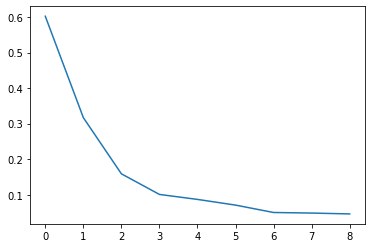

In [229]:
plt.plot(classification_errors_train)

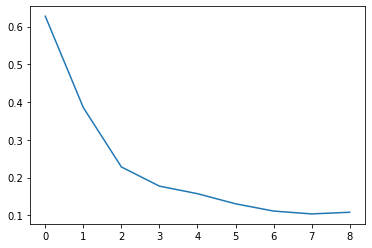

In [230]:
plt.plot(classification_errors_test)